In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import math
from datetime import datetime
import matplotlib.gridspec as gridspec

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1]

In [10]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [11]:
convert_date = lambda x: datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date)
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [13]:
crops = list(data['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [14]:
n = len(crops)

In [ ]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(15,8))
    gs = gridspec.GridSpec(2,2)
    df = dfdates[dfdates['Crop']==crop[i]]
    
    ax1 = fig.add_subplot(gs[0,:])
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    ax1.set_ylabel('counts',fontsize=16,fontstyle='italic')
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    
    dates = ['Planting date','Harvest date']
    for j in range(2):
        index = []
        for k in df[dates[j]].index.values:
            if df.loc[k,dates[j]].year == 2017:
                index.append(k)
        ph_dates = df[dates[j]].loc[index]
        ax = fig.add_subplot(gs[1,j])
        ax.hist(ph_dates.values,color='darkgreen')
        ax.set_title('Distribution of '+dates[j]+' for 2017. year')
        ax.set_ylabel('counts',fontsize=10,fontstyle='italic')
        ax.set_xlabel(dates[j], fontsize=10,fontstyle='italic')
        ax.grid(axis='y',color='lightgrey',alpha=0.5)
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 20, y=0.99)
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    plt.show()

In [ ]:
plot_ph_date(dfdates,0)

In [ ]:
for i in range(n):
    plot_ph_date(dfdates,i)

In [ ]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = []
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    if df2.shape[0] <= 2:
        print('A little bit of data! Please expand your database')
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    
    
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=12, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],fontsize=20,fontweight=5)
        plt.show()

In [ ]:
plot_yield(data,6)

In [ ]:
for i in range(n):
    plot_yield(data,i)

In [ ]:
text = {}
for i in range(n): 
    fig = plt.figure(figsize=(10,5))
    ax = fig2.add_subplot(1,1,1)
    df3 = data[data['Crop']==crop[i]]
    
    
    k = df3['Variety'].value_counts()
    
        
text

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

In [ ]:
for i in range(n):
    
    df5 = data[data['Crop'] == crop[i]]
    length = len(df5['Variety'].unique())
    
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie, labels=list(pie.index.values),autopct=lambda pct: func(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
        plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
        ax5.set_title(crops[i],fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
        ax5.legend(loc=1,fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        ax5.text(-1,1,text,bbox=props,fontsize=15,va='top', ha='left')

        ax5.axis('off')
    
    
        fig5.tight_layout()
plt.show()

In [ ]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
pivot

In [ ]:
chi2 = stats.chi2_contingency(pivot)

In [ ]:
if chi2[1] <= 0.01:
    print('Previous crop and Crop attribute are dependent at level confidence 0.01.')
elif chi2[1] <= 0.05:
    print('Previous crop and Crop attribute are dependent at level confidence 0.05.')
else:
    print('Previous crop and Crop attribute are independent.')

In [15]:
dfdates['Duration of season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [16]:
dfdates['Duration of season (days)'] = dfdates['Duration of season (days)'].apply(lambda x: float(x.days))
dfdates

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date,Duration of season (days)
0,G-1/1,63.38,2018,Maize,0,NS 205,Maize,184.000000,0.000000,237.719575,...,11853.74,9450.000000,5037.277795,15202.253080,7.811455,14.40,112484.94790,2018-06-15,2018-10-15,122.0
1,G-1/2,23.01,2018,Barley,0,Salamandre,Maize,46.000000,0.000000,238.636364,...,11762.74,8594.306050,7079.225979,1435.000000,7.146352,15.80,112912.36650,2017-09-28,2018-06-05,250.0
2,G-2/1,94.88,2018,Soybean,0,Gorstak,Maize,100.330000,0.000000,214.633115,...,11549.50,10191.216890,7146.257137,11843.414040,3.388877,37.35,126574.56120,2018-04-19,2018-09-13,147.0
3,G-2/2,20.59,2018,Soybean,0,Wendy,Maize,93.150000,0.000000,140.845070,...,11571.08,5428.848956,4776.056338,12594.378820,3.712967,37.35,138679.33460,2018-04-17,2018-09-14,150.0
4,G-3/1,63.62,2018,Maize,0,DKC 5830,Wheat,60.000000,1.886199,474.693493,...,12801.04,19899.770510,19745.513990,4947.696479,14.602326,14.40,210273.49890,2018-04-17,2018-09-14,150.0
5,G-3/2,17.80,2018,Maize,0,DKC 5830,Wheat,14.000000,2.134831,264.044944,...,12801.04,16595.812360,8427.921348,6112.939326,13.635393,14.40,196349.66290,2018-04-17,2018-09-14,150.0
6,G-4/1,63.32,2018,Soybean,0,Galeb,Maize,74.226153,0.000000,307.643714,...,11571.08,7447.109918,10072.501580,11048.218540,3.975837,37.35,148497.51260,2018-04-13,2018-09-16,156.0
7,G-4/2,24.71,2018,Soybean,0,Galeb,Maize,80.938891,0.000000,273.735330,...,11571.08,7447.109918,10072.501580,11048.218540,4.068798,37.35,151969.60740,2018-04-13,2018-09-16,156.0
8,G-5/1,76.88,2018,Maize,0,DKC 5830,Soybean,0.949532,0.000000,386.485432,...,12801.04,20071.655440,7823.860562,9002.979318,16.763788,14.40,241398.54320,2018-04-13,2018-09-16,156.0
9,G-5/2,20.98,2018,Maize,0,DKC 5830,Soybean,0.810296,0.000000,266.920877,...,12801.04,19877.951480,8530.791230,7781.716397,11.231649,14.40,161735.74830,2018-04-13,2018-09-16,156.0


In [21]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (5, 5)})
    sns.heatmap(sigmaCorr, square=True)
    plt.title('Heat map for correlation', fontsize='20')
    return sigmaCorr

In [19]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of season (days)']

In [20]:
dfcorr = dfdates[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [ ]:
dfcorr.dtypes

,Yield,Seed,Fertiliser,Pesticide,Duration of season (days)
,,,,,
Yield,1.000000,0.565828,-0.087551,-0.383526,-0.078732
Seed,0.565828,1.000000,0.002490,-0.508070,-0.320707
Fertiliser,-0.087551,0.002490,1.000000,0.229648,0.223011
Pesticide,-0.383526,-0.508070,0.229648,1.000000,0.147258
Duration of season (days),-0.078732,-0.320707,0.223011,0.147258,1.000000


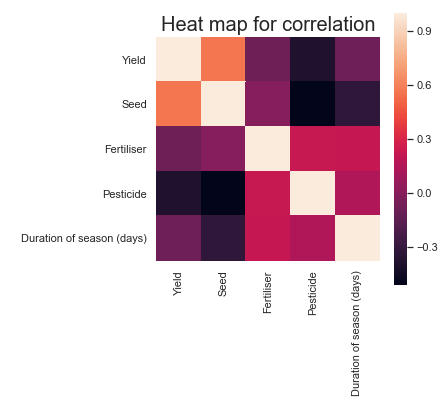

In [22]:
corr(dfcorr)

In [23]:
costs = list(data)[11:20]
costs

['Tillage',
 'Sowing',
 'Fertiliser application',
 'Pesticide application',
 'Irrigation',
 'Harvest',
 'Seed',
 'Fertiliser',
 'Pesticide']

In [24]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [25]:
data['Profit'] = data['Revenue'] - dfcosts.sum(axis=1)

In [26]:
sort = data['Profit'].sort_values(ascending=False)

In [32]:
parcel = []
crop_list = []
area = []
profit = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [data.loc[i,'Parcel']]
    crop_list += [data.loc[i,'Crop']]
    area += [data.loc[i,'Area']]
d = {'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['Parcel','Area (ha)','Crop','Profit (RSD/ha)'])
top5

,Parcel,Area (ha),Crop,Profit (RSD/ha)
0,167B,3.7704,Sunflower,170463.89
1,ED Backa,3.5600,Sunflower,152209.42
2,G-5/1,76.8800,Maize,147285.83
3,G-8/1,78.4900,Maize,144390.43
4,G-3/2,17.8000,Maize,124376.19


In [33]:
grouped_profit = data['Profit'].groupby(data['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

Crop
2nd soybean    -36906.834983
Barley          50174.853969
Maize           57599.027525
Oilseed rape    38036.122779
Soybean         62208.379766
Sunflower       26573.120755
Wheat           20725.734688
Name: Profit, dtype: float64

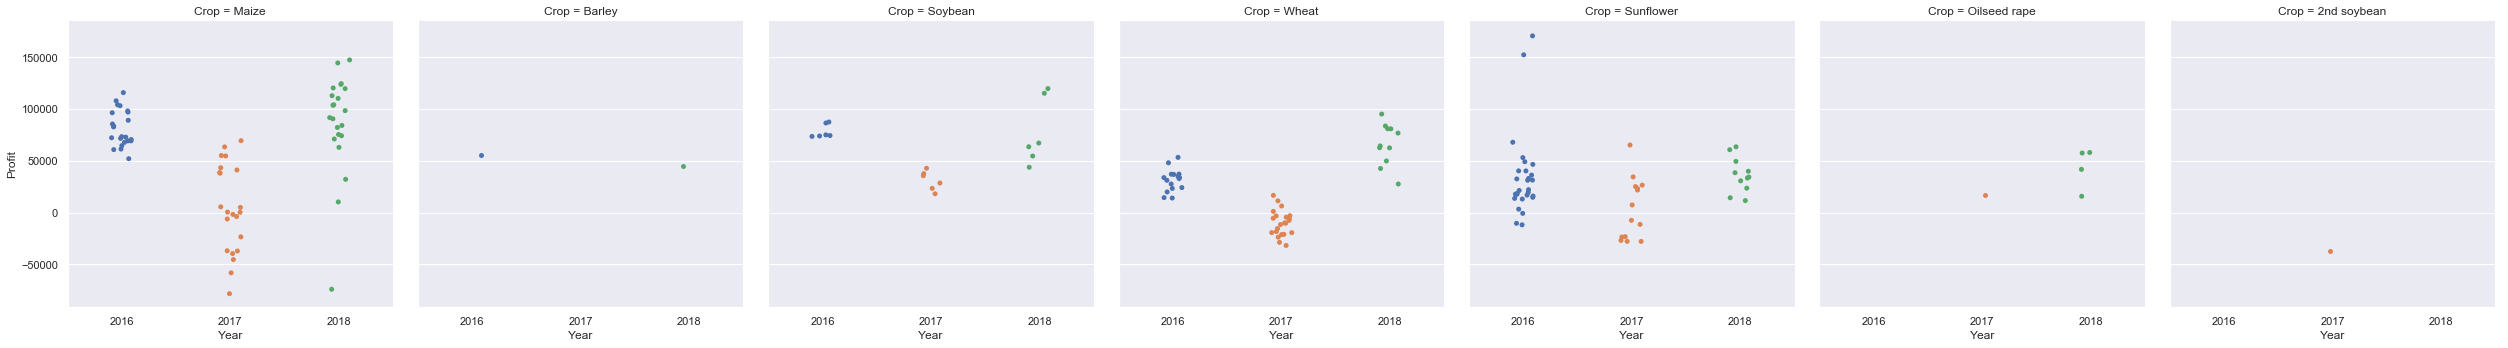

In [48]:
#fig6 = plt.figure(figsize=(15,15))
sns.catplot(data=data,x='Year',y='Profit',col='Crop',kind='strip')

In [34]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

Crop
Soybean         62208.379766
Maize           57599.027525
Barley          50174.853969
Oilseed rape    38036.122779
Sunflower       26573.120755
Wheat           20725.734688
2nd soybean    -36906.834983
Name: Profit, dtype: float64

In [36]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

,Fertiliser amount,Pesticide amount
Crop,,
2nd soybean,268.470000,1.570000
Barley,348.438182,4.318599
Maize,426.432458,3.209088
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619


In [37]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Wheat,599.808986,5.885619
Maize,426.432458,3.209088
Barley,348.438182,4.318599
Sunflower,318.253804,6.213735
Soybean,316.911727,7.189057
2nd soybean,268.470000,1.570000


In [38]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619
Barley,348.438182,4.318599
Maize,426.432458,3.209088
2nd soybean,268.470000,1.570000


In [39]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

,Fertiliser amount,Pesticide amount
Variety,,
Athlon,802.095000,7.507500
Basmati,585.585000,5.817526
DKC 4943,406.980000,2.910000
DKC 5007,408.741434,2.608645
DKC 5031,480.075984,2.068384
DKC 5276,252.638890,4.624717
DKC 5830,468.647458,1.200937
DKC5276,448.950000,9.680000
Falcon,1084.850000,7.480000


In [40]:
top3_var = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=True)[:3]
top3_var

,Fertiliser amount,Pesticide amount
Variety,,
DKC 5830,468.647458,1.200937
Favorit,268.470000,1.570000
LG 30.500,274.020118,1.803677


In [41]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=True)[:3]
top3_var_f

,Fertiliser amount,Pesticide amount
Variety,,
P64Le25,94.095941,7.257073
Sumiko,121.130000,11.590000
P64LE25,136.223443,5.904146
